In [1]:
import pandas as pd
from gmpy2 import mpz

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# for handling SettingWithCopyWarning
from pandas.core.common import SettingWithCopyWarning
import warnings

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
data = pd.read_csv(f"../../data/geometric_mean_analysis.csv")

for i in range(3):
    data[f"input{i}"] = data[f"input{i}"].apply(lambda x: mpz(x))
    
data["gm_mul"] = data.input0 * data.input1 * data.input2
    
data["gm_ideal"] = data["gm_ideal"].apply(lambda x: mpz(x))
data["gm_old"] = data["gm_old"].apply(lambda x: mpz(x))
data["gm_opt"] = data["gm_opt"].apply(lambda x: mpz(x))
data["gm_old_diff"] = data.gm_old - data.gm_ideal
data["gm_opt_diff"] = data.gm_opt - data.gm_ideal

data

,input0,input1,input2,gm_ideal,gm_old,gm_opt,gm_oldgas,gm_optgas,gm_mul,gm_old_diff,gm_opt_diff
0,88849140596907840410020179,17979872632179300774650504,97588392838678752005835887,53820286176269501821091840,53820286176269498038116264,53820286176269498038116264,8124,2886,1558970897892449552647818564263598609394675024...,-3782975576,-3782975576
1,73019036395988628132030347,69685603334417520041163818,29584703218698708579004357,53196385711513295162179584,53196385711513297416033272,53196385711513297416033272,7793,2834,1505380821732807409543806394990549930156429392...,2253853688,2253853688
2,30768253368970063728873146,30313003385927343924243604,87324820033047539534785317,43346746254692545397260288,43346746254692548783034421,43346746254692548783034421,9086,3213,8144595321761340918103095682272115290576181993...,3385774133,3385774133
3,28135591637325019179964764,30875398152079753364984790,41335428939353426057815408,32991117189372167160070144,32991117189372168715089277,32991117189372168715089277,7279,2583,3590798766850612339807448757854830857764094850...,1555019133,1555019133
4,74584566174180368417682753,16617605469773336508852631,25244978505773298211770107,31511141727356409234849792,31511141727356407482997754,31511141727356407482997754,8969,3177,3128905286934066051438714958822654551376688695...,-1751852038,-1751852038
...,...,...,...,...,...,...,...,...,...,...,...
9995,99484812524480411605340158,19280680604121363591068306,64850205915557322600736830,49918727023039284764475392,49918727023039288273362032,49918727023039288273362032,9027,3197,1243914429304801372335522889137985725167069172...,3508886640,3508886640
9996,80118542714632568056448552,40907375642113039000596062,10191176845468751595900503,32204730262665902503755776,32204730262665901498302592,32204730262665901498302592,8697,3141,3340096373819556163226550323778955870898227674...,-1005453184,-1005453184
9997,29155501358731347037707736,36656998949411629124284585,26792695319938625711387960,30593648700928576987332608,30593648700928576735460785,30593648700928576735460785,6890,2511,2863477839566843165236889204412042778752373649...,-251871823,-251871823
9998,85813059755149760284768870,60244179022486523200744885,58999636066735865572300667,67314083461148278609936384,67314083461148276794806850,67314083461148276794806850,6773,2487,3050126212876551556774869922649717304462547581...,-1815129534,-1815129534


In [3]:
(data.gm_old_diff == data.gm_opt_diff).all()

True

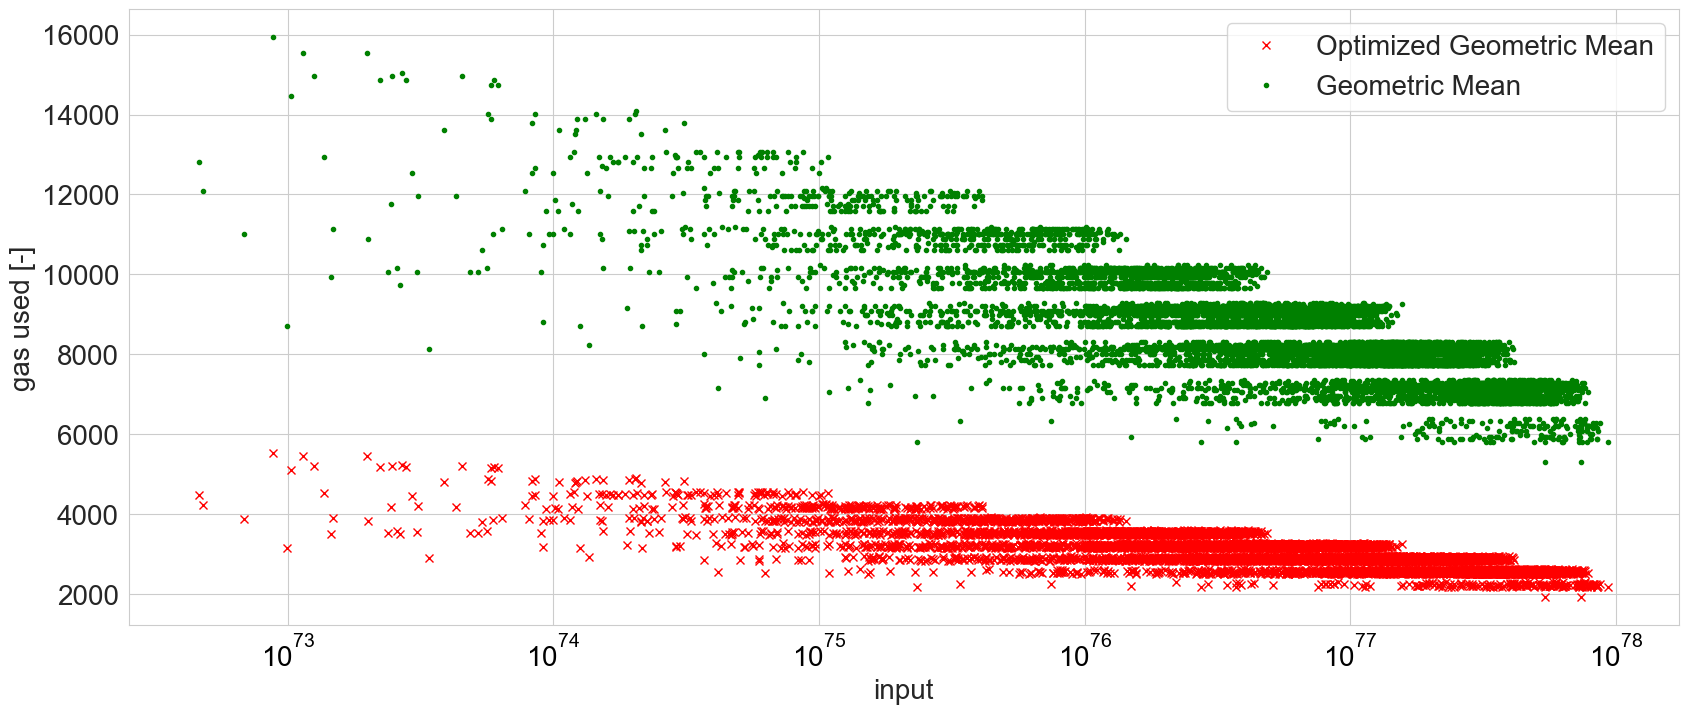

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.gm_mul,
    data.gm_optgas,
    'x',
    color="red",
    label="Optimized Geometric Mean"
)

ax.plot(
    data.gm_mul,
    data.gm_oldgas,
    '.',
    color="green",
    label="Geometric Mean"
)

ax.set_xlabel("input", fontsize=20)
ax.set_ylabel("gas used [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.legend(fontsize=20);

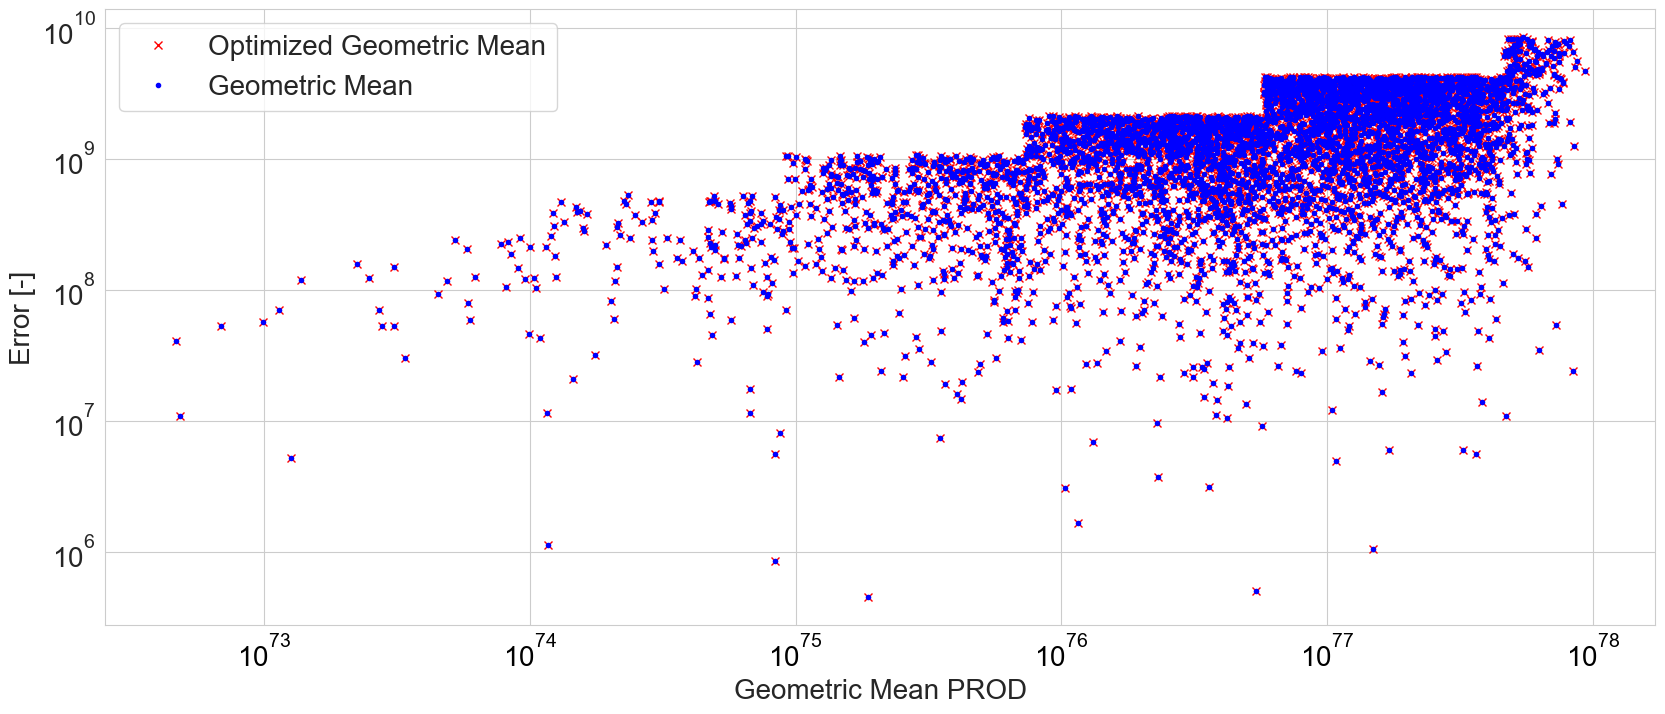

In [5]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

ax.plot(
    data.gm_mul,
    data.gm_opt_diff,
    'x',
    color="red",
    label="Optimized Geometric Mean"
)
ax.plot(
    data.gm_mul,
    data.gm_opt_diff,
    '.',
    color="blue",
    label="Geometric Mean"
)

ax.set_xlabel("Geometric Mean PROD", fontsize=20)
ax.set_ylabel("Error [-]", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', colors='black');
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(fontsize=20);

In [6]:
float(data.gm_mul[data.gm_opt_diff.astype(float).idxmin()])

5.028178894509443e+77